In [3]:
%matplotlib inline

In [18]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [15]:
x = tf.placeholder(tf.float32, None)
y = x * 2

In [17]:
with tf.Session() as session:
    print session.run(y, feed_dict={x : [[1,2,3], [4,5,6]]})

[[  2.   4.   6.]
 [  8.  10.  12.]]


In [19]:
filename = "MarshOrchid.jpg"
raw_image_data = mpimg.imread(filename)

In [20]:
image = tf.placeholder(tf.uint8, None)

In [30]:
tf_slice = tf.slice(image, begin=[1000, 0, 0], size=[3000, -1, -1])

In [31]:
with tf.Session() as session:
    result = session.run(tf_slice, feed_dict={image : raw_image_data})
    print result.shape

(3000, 3685, 3)


In [32]:
raw_image_data.shape

(5528, 3685, 3)

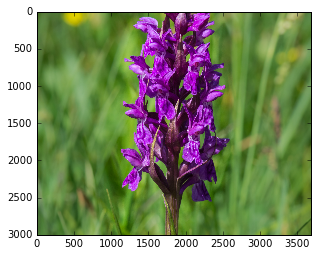

In [33]:
plt.imshow(result)

# 1)

In [38]:
half_height = raw_image_data.shape[0] / 2
half_width = raw_image_data.shape[1] / 2
print half_height, half_width

2764 1842


In [39]:
image = tf.placeholder(tf.uint8, None)
tf_left_top_corner = tf.slice(image, begin=[0, 0, 0], size=[half_height, half_width, -1])
tf_left_bottom_corner = tf.slice(image, begin=[half_height, 0, 0], size=[half_height, half_width, -1])
tf_right_top_corner = tf.slice(image, begin=[0, half_width, 0], size=[half_height, half_width, -1])
tf_right_bottom_corner = tf.slice(image, begin=[half_height, half_width, 0], size=[half_height, half_width, -1])

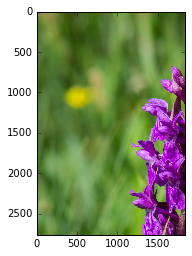

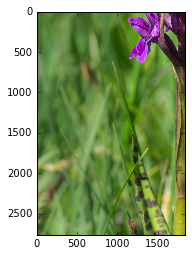

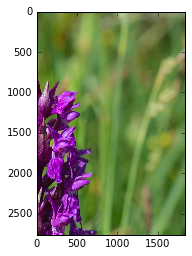

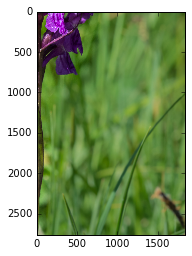

In [44]:
with tf.Session() as session:
    results = session.run([tf_left_top_corner, tf_left_bottom_corner, tf_right_top_corner, tf_right_bottom_corner], feed_dict={image : raw_image_data})
plt.imshow(results[0])
plt.show()
plt.imshow(results[1])
plt.show()
plt.imshow(results[2])
plt.show()
plt.imshow(results[3])
plt.show()

# 2)

In [62]:
image = tf.placeholder(tf.uint8, None)
tf_slice = tf.slice(image, begin=[0, 0, 2], size=[-1, -1, 1])

In [63]:
with tf.Session() as session:
    result = session.run(tf_slice, feed_dict={image : raw_image_data})
    result = result.squeeze()
    print result.shape

(5528, 3685)


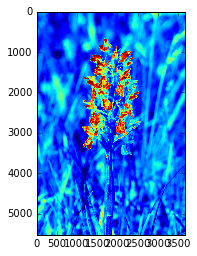

In [64]:
plt.imshow(result)